In [244]:
import os
import numpy as np
import pandas as pd
import pyedflib
import json

In [245]:
data_set = set([it.replace(".json", "") 
                for it in os.listdir("ecg_data") if it.endswith('.json')]) & set([it.replace(".edf", "") 
                for it in os.listdir("ecg_data") if it.endswith('.edf')])

In [246]:
data_dict = dict()
for key in data_set:
    data_dict[key] = dict()
    data_dict[key]['json_path'] = os.path.join("ecg_data",key + ".json")
    data_dict[key]['edf_path'] = os.path.join("ecg_data",key + ".edf")

In [247]:
df_targets = pd.DataFrame()
for patient in data_dict:
    df_buffer = pd.DataFrame(pd.read_json(open(data_dict[patient]['json_path']),orient='columns',
                           typ='series', dtype=False))
    df_buffer = df_buffer.T
    df_buffer['patient'] = patient
    #   df_buffer['patient'] = patient
    df_targets = df_targets.append(df_buffer.set_index('patient'))

In [248]:
df_numeric_targets = df_targets.applymap(lambda x: int(x))

In [249]:
df_numeric_targets.head()

,left_ventricular_hypertrophy,sinus_tachycardia,normal,nodal_rhythm,AV_blockade_III_st,atrial_rhythm,abnormalities_Q_right ventricle,AV_dissociation,impaired_T_wave_lead_i,CA_blockade,...,nodal,WPW_syndrome,sharp_right_deviation,MI_with_ST_lift_rear_wall,incomplete_left_bundle_branch_blockade,extended_QT_interval,impaired_T_wave_lead_ii,horizontal,elongated_PQ,atrial_flutter
patient,,,,,,,,,,,,,,,,,,,,,
60760148,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1102554774,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50653786,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50519665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102555723,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [250]:
import matplotlib.pyplot as plt

In [251]:
_series = df_numeric_targets.sum(axis=0)
_series[_series==0].index  # classes with zero population

Index(['nodal_rhythm', 'AV_blockade_III_st', 'abnormalities_Q_right ventricle',
       'AV_dissociation', 'CA_blockade', 'impairment_stimulation',
       'intoxication_cardiac_glycosides',
       'MI_with_ST_depression_before_frontal', 'sharp_left_deviation',
       'impaired_T_wave_lead_v1', 'tachycardia_pirouette',
       'impaired_T_wave_lead_avr', 'embolism_pulmonary_artery',
       'ventricular_tachycardia', 'AV_blockade_II_st_2_type',
       'blockade_posterior_branch_left_branch_bundle',
       'supraventricular_tachycardia', 'shortened_PQ',
       'abnormalities_Q_anteroferra', 'blockade_both_legs_bundle',
       'shortened_QT_interval', 'nodal', 'sharp_right_deviation'],
      dtype='object')

In [252]:
df_numeric_targets.drop(_series[_series==0].index, axis=1, inplace=True)

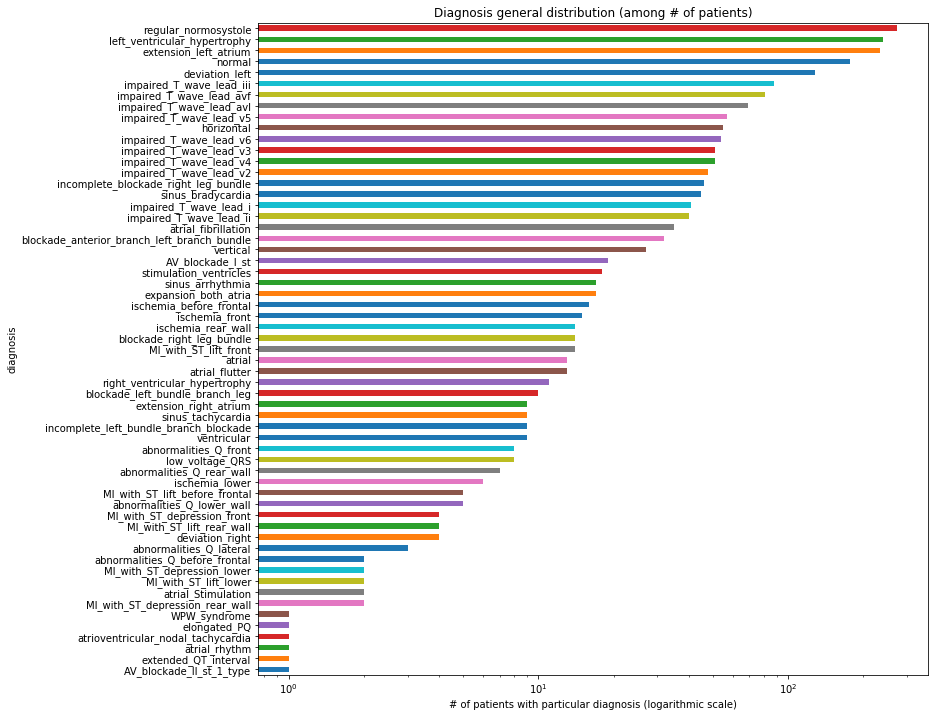

In [253]:
plt.figure(figsize=(12, 12))
df_numeric_targets.sum(axis=0).sort_values().plot.barh()
plt.title("Diagnosis general distribution (among # of patients)")
plt.xlabel("# of patients with particular diagnosis (logarithmic scale)")
plt.xscale('log')
plt.ylabel("diagnosis")
# plt
pass

In [254]:
df_numeric_targets.shape

(409, 59)

In [255]:
print("Количество пересекающихся диагнозов: {0}".format(len(df_numeric_targets.columns)))

Количество пересекающихся диагнозов: 59


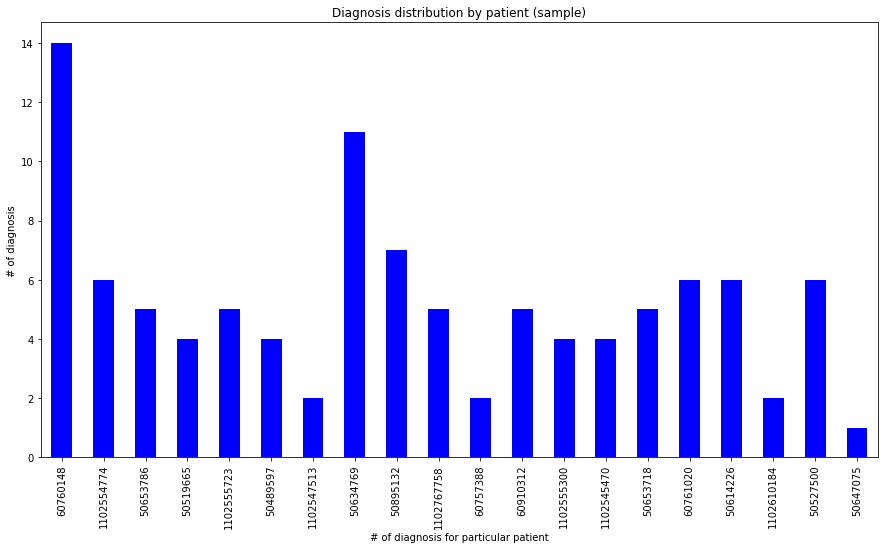

In [256]:
plt.figure(figsize=(15, 8))
df_numeric_targets.iloc[:20].sum(axis=1).plot.bar(color='b')
plt.title("Diagnosis distribution by patient (sample)")
plt.xlabel("# of diagnosis for particular patient")
# plt.xticks(np.arange(0, 14, step=1))
plt.ylabel("# of diagnosis")
pass

# Теперь давайте посмотрим на диагнозы более верхнеуровнево


---




In [257]:
diagnosis_dict_list = json.load(open("ecg_data/diagnosis.json",encoding='utf8'))

In [258]:
print("Количество категорий диагнозов: {0}".format(len([it['type'] for it in diagnosis_dict_list if it['type']=='category'])))

Количество категорий диагнозов: 12


In [259]:
[it.update({'1st_level_category':'PQ_characteristics',
            '1st_level_cat_desc':'P-Q особенности',
            '2nd_level_category':'PQ_characteristics',
            '2nd_level_cat_desc':'P-Q особенности'}) for it in diagnosis_dict_list if it['type']!='category']
print("Не категориальные диагнозы категоризуем вручную:")
[it for it in diagnosis_dict_list if it['type']!='category']

Не категориальные диагнозы категоризуем вручную:


[{'name': 'shortened_PQ',
  'type': 'diagnosis',
  'value': 'Укороченный P-Q',
  'level': 'yellow',
  '1st_level_category': 'PQ_characteristics',
  '1st_level_cat_desc': 'P-Q особенности',
  '2nd_level_category': 'PQ_characteristics',
  '2nd_level_cat_desc': 'P-Q особенности'},
 {'name': 'elongated_PQ',
  'type': 'diagnosis',
  'value': 'Удлиненный P-Q',
  'level': 'yellow',
  '1st_level_category': 'PQ_characteristics',
  '1st_level_cat_desc': 'P-Q особенности',
  '2nd_level_category': 'PQ_characteristics',
  '2nd_level_cat_desc': 'P-Q особенности'}]

## Приведем два уровня иерархии категорий для каждого диагноза

In [260]:
categorised_diagnosis_dict = dict()
for cat_dict in [it for it in diagnosis_dict_list]:
    if cat_dict['type'] != 'diagnosis':
        for diagnose_dict in cat_dict['value']:
            if diagnose_dict['type']!='diagnosis':
                for _sub_dict in diagnose_dict['value']:
                    _dict = dict()
                    _dict['1st_level_category'] = cat_dict['name']
                    _dict['1st_level_cat_desc'] = cat_dict['description']
                    _dict['2nd_level_category'] = diagnose_dict['name']
                    _dict['2nd_level_cat_desc'] = diagnose_dict['description']
                    _dict['alert_level'] = _sub_dict['level']
                    _dict['diagnose_desc'] = _sub_dict['value']
                    categorised_diagnosis_dict[_sub_dict['name']] = _dict
            else:
                _dict = dict()
                _dict['1st_level_category'] = cat_dict['name']
                _dict['1st_level_cat_desc'] = cat_dict['description']
                _dict['2nd_level_category'] = cat_dict['name']
                _dict['2nd_level_cat_desc'] = cat_dict['description']
                _dict['alert_level'] = diagnose_dict['level']
                _dict['diagnose_desc'] = diagnose_dict['value']
                categorised_diagnosis_dict[diagnose_dict['name']] = _dict
    else:
        _dict = dict()
        _dict['1st_level_category'] = cat_dict['1st_level_category']
        _dict['1st_level_cat_desc'] = cat_dict['1st_level_cat_desc']
        _dict['2nd_level_category'] = cat_dict['2nd_level_category']
        _dict['2nd_level_cat_desc'] = cat_dict['2nd_level_cat_desc']
        _dict['alert_level'] = cat_dict['level']
        _dict['diagnose_desc'] = cat_dict['value']
        categorised_diagnosis_dict[cat_dict['name']] = _dict
    #     print(cat_dict)

In [261]:
# Проверим что разметили категории для всех диагнозов
set(categorised_diagnosis_dict.keys()) ^ set(df_numeric_targets.columns)

{'AV_blockade_III_st',
 'AV_blockade_II_st_2_type',
 'AV_dissociation',
 'CA_blockade',
 'MI_with_ST_depression_before_frontal',
 'abnormalities_Q_anteroferra',
 'abnormalities_Q_right ventricle',
 'blockade_both_legs_bundle',
 'blockade_posterior_branch_left_branch_bundle',
 'embolism_pulmonary_artery',
 'impaired_T_wave_lead_avr',
 'impaired_T_wave_lead_v1',
 'impairment_stimulation',
 'intoxication_cardiac_glycosides',
 'nodal',
 'nodal_rhythm',
 'sharp_left_deviation',
 'sharp_right_deviation',
 'shortened_PQ',
 'shortened_QT_interval',
 'supraventricular_tachycardia',
 'tachycardia_pirouette',
 'ventricular_tachycardia'}

## Имея маппинг диагнозов на категории, можем проанализировать распределение целевых значений по группам

In [262]:
target_set_1st_lvl = set([categorised_diagnosis_dict[it]['1st_level_category'] for it in categorised_diagnosis_dict])
target_set_2nd_lvl = set([categorised_diagnosis_dict[it]['2nd_level_category'] for it in categorised_diagnosis_dict])
target_set_color_lvl = set([categorised_diagnosis_dict[it]['alert_level'] for it in categorised_diagnosis_dict])

In [263]:
len(target_set_2nd_lvl)

17

In [264]:
df_categorised_targets_1st_level = pd.DataFrame(columns=list(target_set_1st_lvl) + ['patient'])
df_categorised_targets_2nd_level = pd.DataFrame(columns=list(target_set_2nd_lvl) + ['patient'])
df_categorised_targets_color_level = pd.DataFrame(columns=list(target_set_color_lvl) + ['patient'])
for patient in df_numeric_targets.index:
    patient_series = df_numeric_targets.loc[patient]
    #   print(patient, patient_series[patient_series > 0].index)
    _diagnosis_1st_lvl_list = [categorised_diagnosis_dict[it]['1st_level_category'] for it in patient_series[patient_series > 0].index]
    pattern_1st_lvl = [_it if _it[0] not in _diagnosis_1st_lvl_list else (_it[0], 1) for _it in 
                     [it for it in 
                      zip(df_categorised_targets_1st_level.columns, 
                          [0]*len(target_set_1st_lvl) + [patient])]
                    ]
    _diagnosis_2nd_lvl_list = [categorised_diagnosis_dict[it]['2nd_level_category'] for it in patient_series[patient_series > 0].index]
    pattern_2nd_lvl = [_it if _it[0] not in _diagnosis_2nd_lvl_list else (_it[0], 1) for _it in 
                     [it for it in 
                      zip(df_categorised_targets_2nd_level.columns, 
                          [0]*len(target_set_2nd_lvl) + [patient])]
                    ]

    _diagnosis_color_lvl_list = [categorised_diagnosis_dict[it]['alert_level'] for it in patient_series[patient_series > 0].index]
    pattern_color_lvl = [_it if _it[0] not in _diagnosis_color_lvl_list else (_it[0], 1) for _it in 
                     [it for it in 
                      zip(df_categorised_targets_color_level.columns, 
                          [0]*len(target_set_color_lvl) + [patient])]
                    ]
    df_categorised_targets_1st_level = df_categorised_targets_1st_level.append(dict(pattern_1st_lvl), ignore_index=True)
    df_categorised_targets_2nd_level = df_categorised_targets_2nd_level.append(dict(pattern_2nd_lvl), ignore_index=True)
    df_categorised_targets_color_level = df_categorised_targets_color_level.append(dict(pattern_color_lvl), ignore_index=True)
    #   print(pattern_1st_lvl)
    #   print(pattern_2nd_lvl)


    #   break

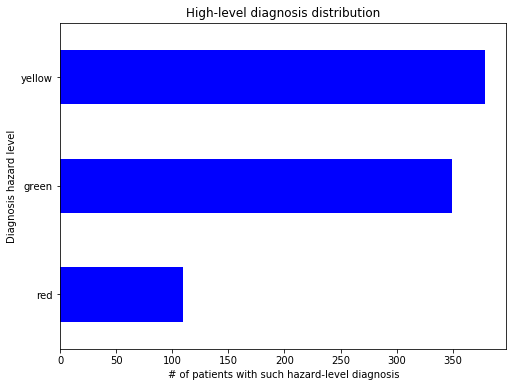

In [265]:
plt.figure(figsize=(8,6))
df_categorised_targets_color_level.set_index('patient').sum(axis=0).sort_values().plot.barh(color='b')
plt.title("High-level diagnosis distribution")
plt.xlabel("# of patients with such hazard-level diagnosis")
# plt.xticks(np.arange(0, 14, step=1))
plt.ylabel("Diagnosis hazard level")
plt.show()

In [266]:
df_categorised_targets_color_level.set_index('patient').head()

,yellow,green,red
patient,,,
60760148,1,1,0
1102554774,1,1,0
50653786,1,1,0
50519665,1,0,1
1102555723,1,1,1


In [267]:
df_categorised_targets_color_level.set_index('patient').shape

(409, 3)

In [268]:
Y = df_categorised_targets_color_level.set_index('patient')

In [269]:
color_dataset_dict = dict()
for patient in Y.index:
    try:
        ecg_x = pyedflib.EdfReader("./ecg_data/{0}.edf".format(patient))
        sigbufs = np.zeros((ecg_x.signals_in_file, ecg_x.getNSamples()[0]))
        for i in np.arange(ecg_x.signals_in_file):
            sigbufs[i, :] = ecg_x.readSignal(i)
            color_dataset_dict[patient] = sigbufs
        ecg_x._close()
        del ecg_x
    except:
        print(patient)
#   print(sigbufs.shape)

In [270]:
color_dataset_dict['1102625288'].shape

(12, 5000)

In [271]:
Y.loc['1102625288'].green

1

In [272]:
data_dict = dict()
for i in range(12):
    X_arr = np.zeros((len(color_dataset_dict.keys())*10,500))
    Y_arr = np.zeros((len(color_dataset_dict.keys())*10,1))
    j = 0
    for patient in color_dataset_dict.keys():
#         print(patient, Y.loc[patient].green)
        for it in range(500, 5000, 500):
            X_arr[j, :] = np.tanh(color_dataset_dict[patient][i][it-500:it])
            Y_arr[j,:] = Y.loc[patient].red
            j += 1
    data_dict["{0}-lead".format(i)] = (X_arr, Y_arr)


In [273]:
for i in range(12):
    baseline = np.mean([target[0] for target in data_dict["{0}-lead".format(i)][1]])
    print("Baseline for {1}-lead: {0}".format(1-baseline, i))

Baseline for 0-lead: 0.7579462102689487
Baseline for 1-lead: 0.7579462102689487
Baseline for 2-lead: 0.7579462102689487
Baseline for 3-lead: 0.7579462102689487
Baseline for 4-lead: 0.7579462102689487
Baseline for 5-lead: 0.7579462102689487
Baseline for 6-lead: 0.7579462102689487
Baseline for 7-lead: 0.7579462102689487
Baseline for 8-lead: 0.7579462102689487
Baseline for 9-lead: 0.7579462102689487
Baseline for 10-lead: 0.7579462102689487
Baseline for 11-lead: 0.7579462102689487


In [274]:
from torchesn.nn import ESN

In [275]:
from torch import Tensor
import torch.nn.functional as F

In [276]:
full_data = [ (Tensor([it[0]]), Tensor(it[1])) for it in zip(*data_dict["0-lead"]) ]

In [277]:
len(full_data[0][0])

1

In [278]:
indices = list(range(len(full_data)))
val_indices = np.random.choice(indices, size = 200)
train_indices = list(set(indices) - set(val_indices))

In [279]:
val_data = [full_data[it] for it in val_indices]
train_data = [full_data[it] for it in train_indices]

In [280]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, shuffle=True, batch_size=50)
val_loader = DataLoader(val_data, shuffle=False, batch_size=50)

In [281]:
import tqdm
from tqdm import tnrange

In [282]:
import torch

In [283]:
model = ESN(input_size=500, hidden_size=50, num_layers=1, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=0.5,
           w_io=False, readout_training='gd', spectral_radius=0.9)

In [284]:
import torch.optim as optim
import torch.nn as nn
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [285]:
def calc_accuracy(_model, _dataloader=val_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in _dataloader:
            x, labels = data
            outputs = torch.sigmoid(_model(x, [0])[0])
            y_hat = outputs.apply_(lambda x: 0 if x < 0.5 else 1)
            total += labels.size(0)
            correct += (y_hat.squeeze(-1) == labels).sum().item()
    return correct / total

In [287]:
        
#         # print statisticsdef _validation(_model, criterion, _dataloader=val_loader):
#     loss_list=[]
#     for batch in _dataloader:
#         inputs, labels = batch
#         outputs = model(inputs, [0])[0].squeeze(-1)
#         loss_list.append(criterion(outputs, labels).item())
#     return np.mean(loss_list), calc_accuracy(_model)
    

In [288]:
import shutil
def save_checkpoint(state, is_best, model_name, filename='./{0}_checkpoint.pth.tar'):
    torch.save(state, filename.format(model_name))
    if is_best:
        shutil.copyfile(filename.format(model_name), '{0}_model_best.pth.tar'.format(model_name))

In [289]:
def save_if_better_than_best(_epoch, _model, _acc, _loss, _optimizer, _model_name):
    best_model_path = '{0}_model_best.pth.tar'.format(_model_name)
    if os.path.isfile(best_model_path):
        best_acc = torch.load(best_model_path)['val_accuracy']
    else:
        best_acc = 0
    if best_acc <= _acc:
        save_checkpoint({
                    'epoch': _epoch + 1,
                    'state_dict': _model.state_dict(),
                    'val_accuracy': _acc,
                    'val_loss': _loss,
                    'optimizer' : _optimizer.state_dict(),
                }, True, _model_name)
    

In [290]:
import json
def get_best_model_hyperopt(_model_name):
    best_model_path = '{0}_model_best.pth.tar'.format(_model_name)
    return torch.load(best_model_path)['val_accuracy']

In [291]:
# def resume_best_model(model_name):
    

In [292]:
# if resume:
#     if os.path.isfile(resume):
#         print("=> loading checkpoint '{}'".format(resume))
#         checkpoint = torch.load(resume)
#         start_epoch = checkpoint['epoch']
#         val_accuracy = checkpoint['val_accuracy']
#         val_loss = checkpoint['val_loss']
#         model.load_state_dict(checkpoint['state_dict'])
#         optimizer.load_state_dict(checkpoint['optimizer'])
#         print("=> loaded checkpoint '{}' (epoch {})"
#               .format(resume, checkpoint['epoch']))
#     else:
#         print("=> no checkpoint found at '{}'".format(resume))

In [293]:
t = tnrange(25, desc='Epochs: ', leave=True)
loss_list = []
acc_list = []
_loss = np.nan
_accuracy = np.nan

for epoch in t:
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs, [0])[0].squeeze(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 9:
            t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
    _loss, _accuracy = _validation(model, criterion)
    acc_list.append(_accuracy)
    loss_list.append(_loss)
    save_if_better_than_best(epoch,model,_accuracy, _loss, optimizer, 'test')
print('Finished Training')

Finished Training


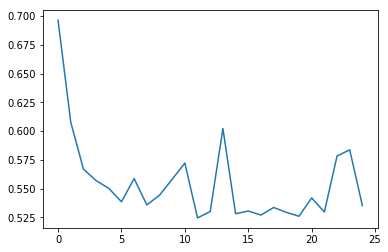

In [294]:
plt.plot(loss_list)

In [295]:
get_best_model_hyperopt('test')

0.785

In [296]:
hidden_size_dict = {}
for n in range(10, 370, 50):
    model = ESN(input_size=500, hidden_size=n, num_layers=1, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=0.5,
           w_io=False, readout_training='gd', spectral_radius=0.9)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'hidden_size_{0}'.format(n))
        
    hidden_size_dict[n] = dict()   
    hidden_size_dict[n]['loss'] = loss_list
    hidden_size_dict[n]['best_val_accuracy'] = get_best_model_hyperopt('hidden_size_{0}'.format(n))

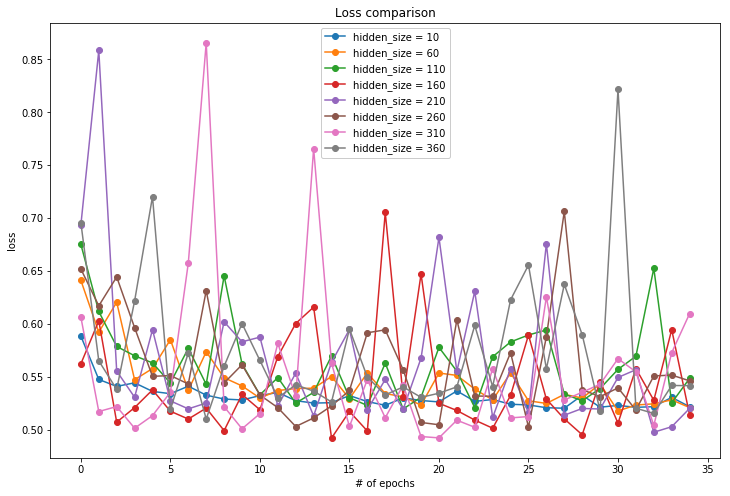

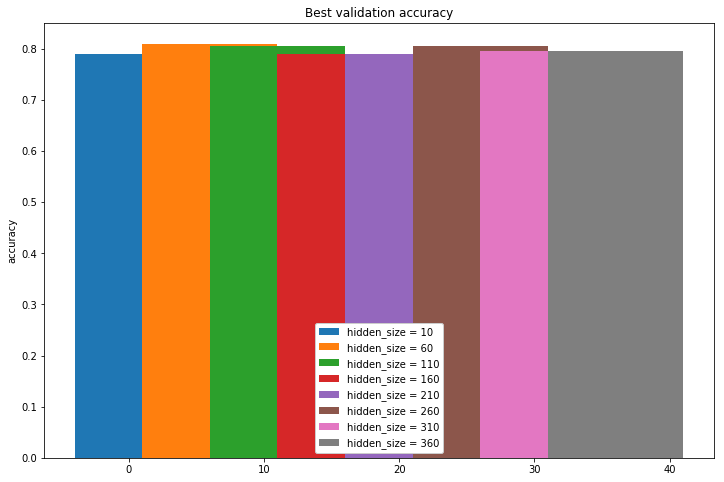

In [297]:
for key, _dict in hidden_size_dict.items():
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='hidden_size = {0}'.format(key))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key/10, value, width=10, label='hidden_size = {0}'.format(key))
#             plt.xlabel("Size of reservoir /10")
            plt.ylabel("accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [299]:
hidden_size_dict_l = {}
for n in range(10, 370, 50):
    model = ESN(input_size=500, hidden_size=n, num_layers=1, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='last', leaking_rate=0.5,
           w_io=False, readout_training='gd', spectral_radius=0.9)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'hidden_size_l_{0}'.format(n))
        
    hidden_size_dict_l[n] = dict()   
    hidden_size_dict_l[n]['loss'] = loss_list
    hidden_size_dict_l[n]['best_val_accuracy'] = get_best_model_hyperopt('hidden_size_l_{0}'.format(n))

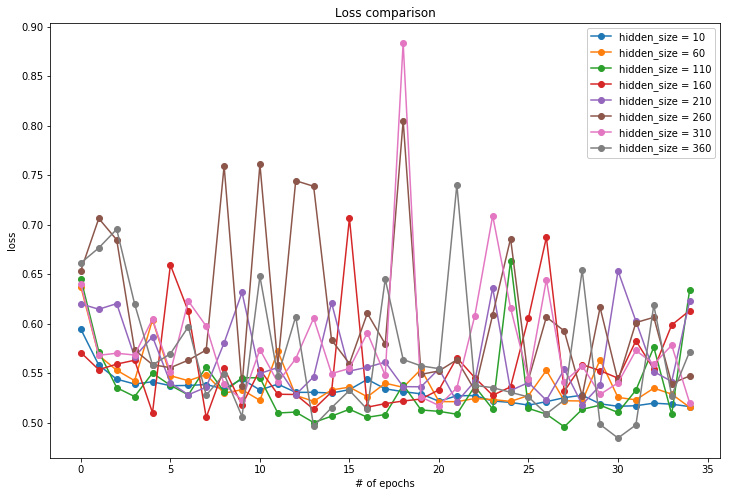

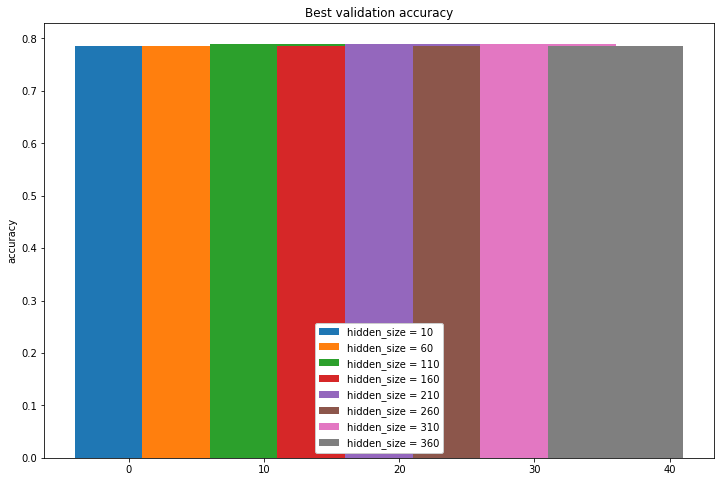

In [300]:
for key, _dict in hidden_size_dict_l.items():
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='hidden_size = {0}'.format(key))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key/10, value, width=10, label='hidden_size = {0}'.format(key))
#             plt.xlabel("Size of reservoir /10")
            plt.ylabel("accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [301]:
sp_radius_size_dict = {}
for n in np.arange(0.09, 2.4, 0.27):
    model = ESN(input_size=500, hidden_size=200, num_layers=1, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=0.5,
           w_io=False, readout_training='gd', spectral_radius=float(n))
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'spectral_radius_{0}'.format(n))
        
    sp_radius_size_dict[n] = dict()   
    sp_radius_size_dict[n]['loss'] = loss_list
    sp_radius_size_dict[n]['best_val_accuracy'] = get_best_model_hyperopt('spectral_radius_{0}'.format(n))

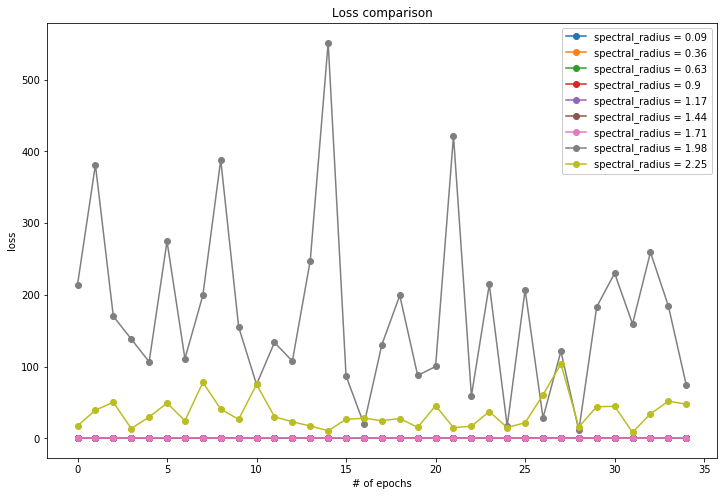

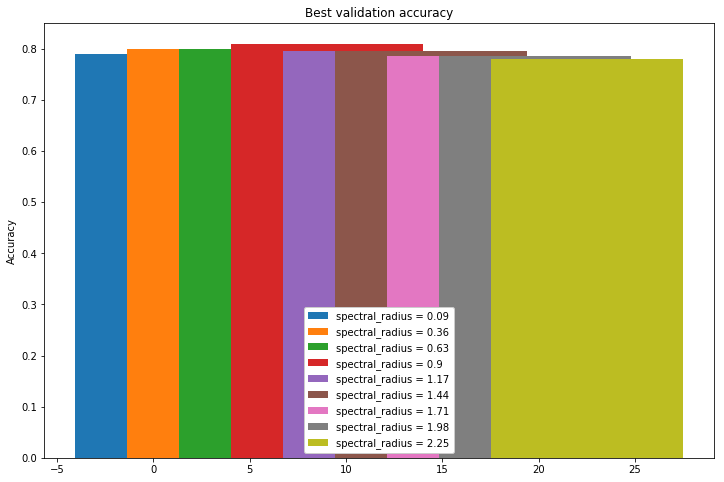

In [302]:
for key, _dict in sp_radius_size_dict.items():
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='spectral_radius = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key*10, value, width=10, label='spectral_radius = {0}'.format(round(key,2)))
#             plt.xlabel("spectral radius * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

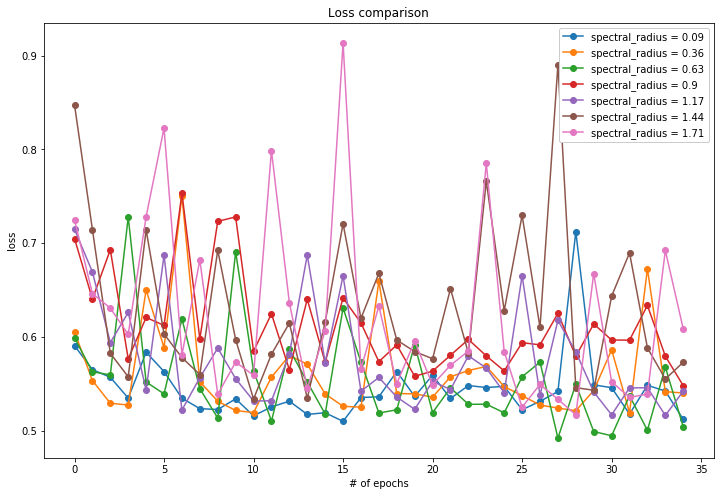

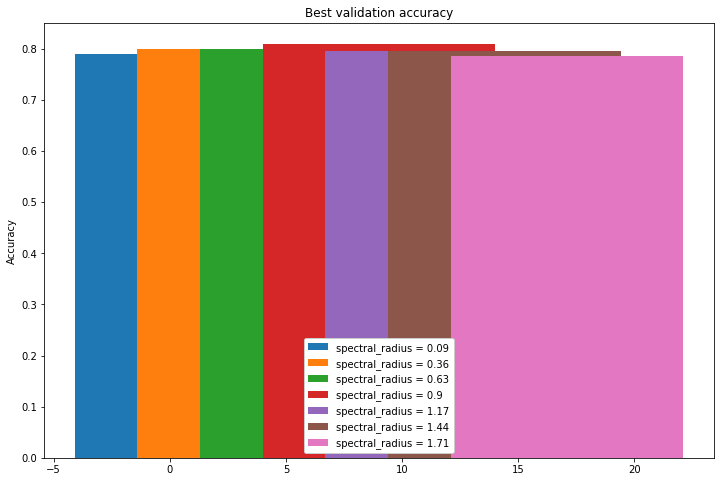

In [303]:
for key, _dict in [it for it in sp_radius_size_dict.items()][:-2]:
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='spectral_radius = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key*10, value, width=10, label='spectral_radius = {0}'.format(round(key,2)))
#             plt.xlabel("spectral radius * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

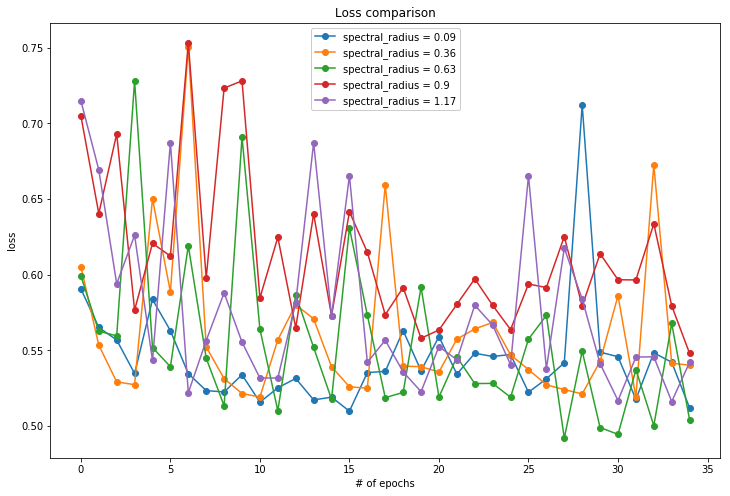

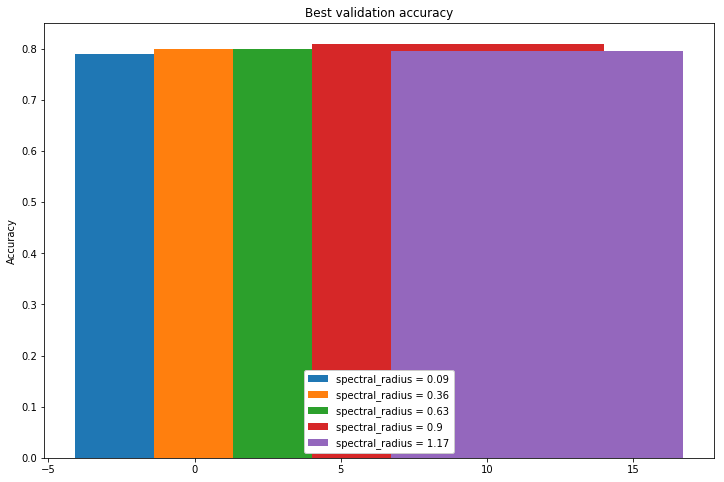

In [304]:
for key, _dict in [it for it in sp_radius_size_dict.items()][:-4]:
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='spectral_radius = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key*10, value, width=10, label='spectral_radius = {0}'.format(round(key,2)))
#             plt.xlabel("spectral radius * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [305]:
reserv_num_dict = {}
for n in range(1, 7, 2):
    model = ESN(input_size=500, hidden_size=200, num_layers=n, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=0.5,
           w_io=False, readout_training='gd', spectral_radius=0.9)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'reservoir_num_{0}'.format(n))
        
    reserv_num_dict[n] = dict()   
    reserv_num_dict[n]['loss'] = loss_list
    reserv_num_dict[n]['best_val_accuracy'] = get_best_model_hyperopt('reservoir_num_{0}'.format(n))

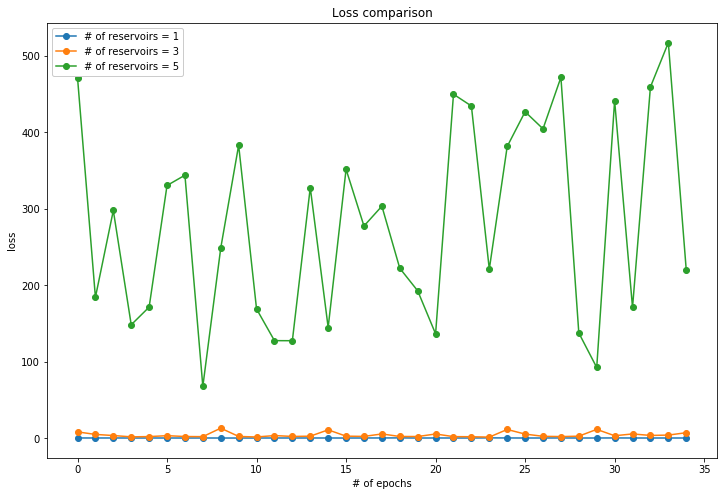

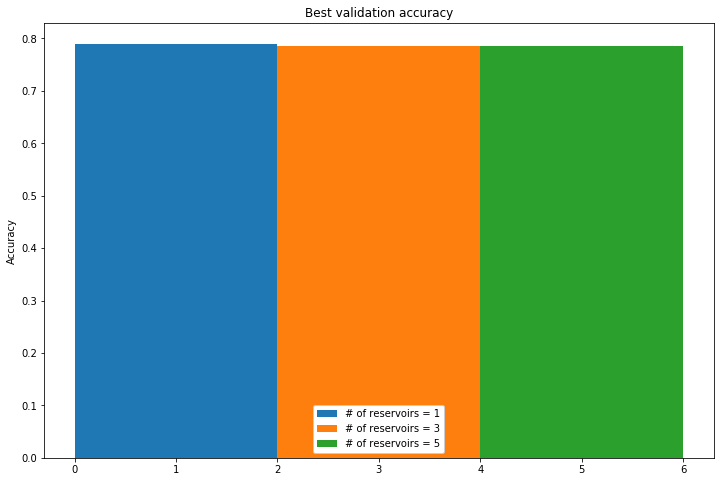

In [306]:
for key, _dict in reserv_num_dict.items():
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='# of reservoirs = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key, value, width=2, label='# of reservoirs = {0}'.format(round(key,2)))
#             plt.xlabel("# of reservoirs * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

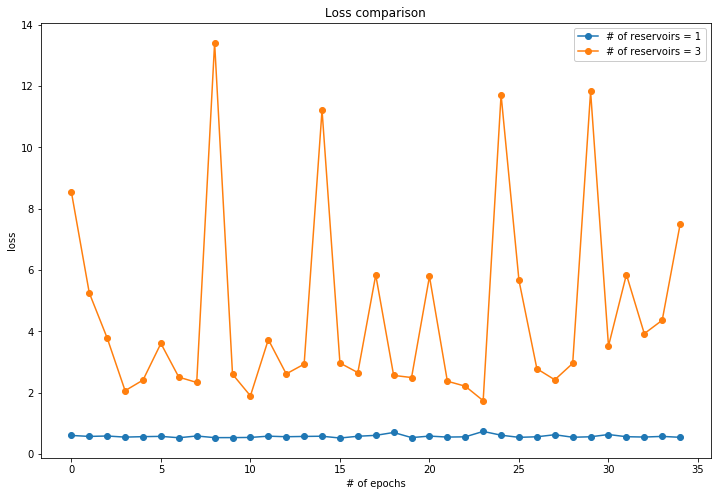

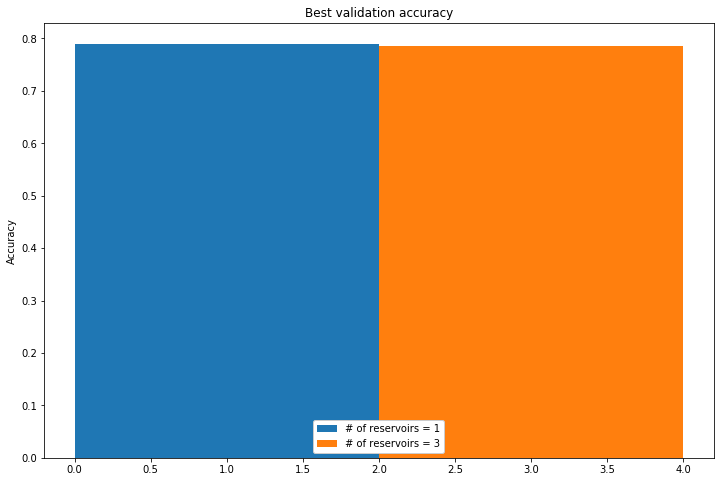

In [307]:
for key, _dict in [it for it in reserv_num_dict.items()][:-1]:
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='# of reservoirs = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key, value, width=2, label='# of reservoirs = {0}'.format(round(key,2)))
#             plt.xlabel("# of reservoirs * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [308]:
leaking_rate_dict = {}
for lr in np.arange(0.03, 1.0, 0.2):
    model = ESN(input_size=500, hidden_size=200, num_layers=1, output_size=1, 
            nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=float(lr),
           w_io=False, readout_training='gd', spectral_radius=0.9)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'leaking_rate_{0}'.format(lr))
        
    leaking_rate_dict[lr] = dict()   
    leaking_rate_dict[lr]['loss'] = loss_list
    leaking_rate_dict[lr]['best_val_accuracy'] = get_best_model_hyperopt('leaking_rate_{0}'.format(lr))

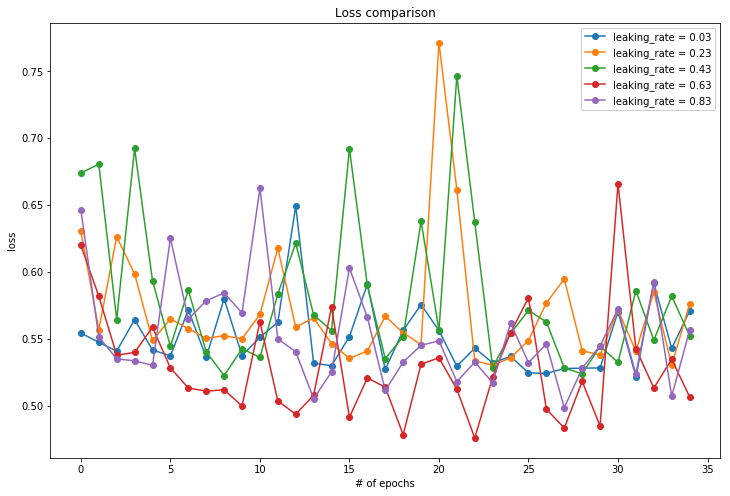

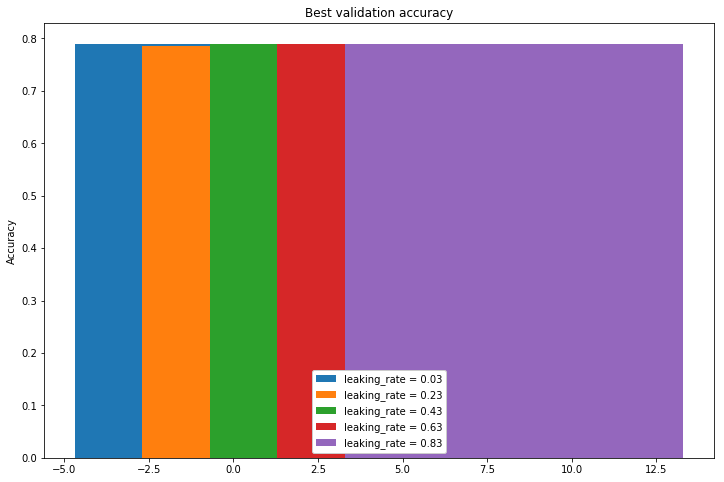

In [309]:
for key, _dict in [it for it in leaking_rate_dict.items()][:]:
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='leaking_rate = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key*10, value, width=10, label='leaking_rate = {0}'.format(round(key,2)))
#             plt.xlabel("leaking_rate * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [310]:
model = ESN(input_size=500, hidden_size=60, num_layers=1, output_size=1, 
        nonlinearity='relu', density=0.2, output_steps='mean', leaking_rate=0.25,
       w_io=True, readout_training='gd', spectral_radius=0.9)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

t = tnrange(35, desc='Epochs: ', leave=True)
loss_list = []
for epoch in t:
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs, [0])[0].squeeze(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 9:
            t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
    _loss, _accuracy = _validation(model, criterion)
    acc_list.append(_accuracy)
    loss_list.append(_loss)
    save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'fine_tune')
        
#     leaking_rate_dict[lr] = dict()   
#     leaking_rate_dict[lr]['loss'] = loss_list
#     leaking_rate_dict[lr]['best_val_accuracy'] = get_best_model_hyperopt('leaking_rate_{0}'.format(lr))

In [311]:
get_best_model_hyperopt('fine_tune')

0.795

In [242]:
# reservouir density

In [313]:
reservoir_density_dict = {}
for density in np.arange(0.1, 1.0, 0.1):
    model = ESN(input_size=500, hidden_size=60, num_layers=1, output_size=1, 
            nonlinearity='relu', density=float(density), output_steps='mean', leaking_rate=0.6,
           w_io=False, readout_training='gd', spectral_radius=0.9)
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    t = tnrange(35, desc='Epochs: ', leave=True)
    loss_list = []
    for epoch in t:
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs, [0])[0].squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % 10 == 9:
                t.set_postfix(batch=i, val_loss=_loss, val_acc=_accuracy)
        _loss, _accuracy = _validation(model, criterion)
        acc_list.append(_accuracy)
        loss_list.append(_loss)
        save_if_better_than_best(epoch, model, _accuracy, _loss, optimizer, 'density_{0}'.format(lr))
        
    reservoir_density_dict[density] = dict()
    reservoir_density_dict[density]['loss'] = loss_list
    reservoir_density_dict[density]['best_val_accuracy'] = get_best_model_hyperopt('density_{0}'.format(lr))

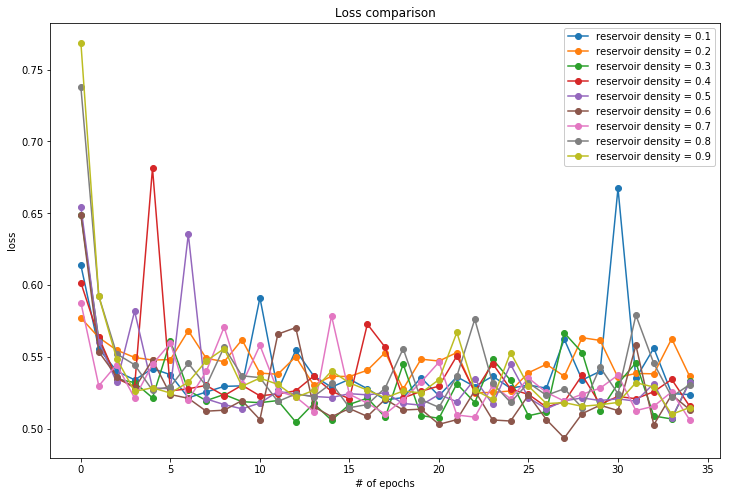

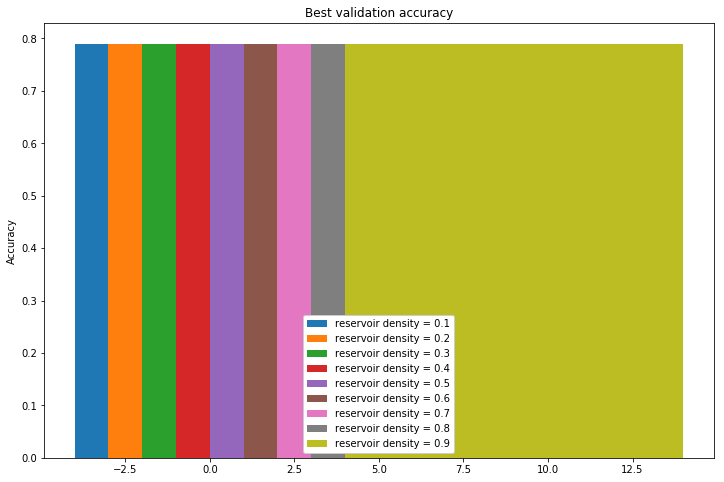

In [315]:
for key, _dict in [it for it in reservoir_density_dict.items()][:]:
    for i, (attr_key, value) in enumerate(_dict.items()):
        plt.figure(i, figsize=(12, 8))
        if type(value) == list:
            plt.title("Loss comparison")
            plt.plot(range(len(value)), value, '-o', label='reservoir density = {0}'.format(round(key,2)))
            plt.xlabel("# of epochs")
            plt.ylabel("loss")
            plt.legend(loc='best', framealpha = 1)
        else:
            plt.title("Best validation accuracy")
            plt.bar(key*10, value, width=10, label='reservoir density = {0}'.format(round(key,2)))
#             plt.xlabel("leaking_rate * 10")
            plt.ylabel("Accuracy")
            plt.legend(loc='lower center', framealpha = 1)
plt.show()

In [318]:
import networkx as nx

In [319]:
reservoirs_state_list = [it for it in model.named_parameters() if "reservoir.weight_hh" in it[0]]

In [320]:
# reservoir state 

In [321]:
G = nx.from_numpy_array(reservoirs_state_list[0][1].data.numpy())

/home/pdsmirnov/projects/university/esn_research/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


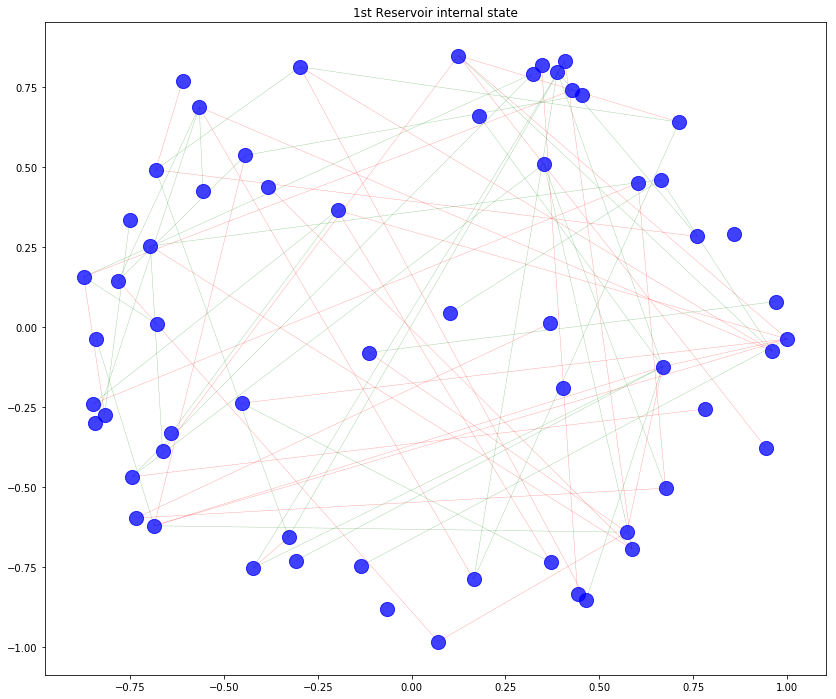

In [323]:
plt.figure(figsize=(14, 12))
plt.title('1st Reservoir internal state')
neg_edges = [it for it in G.edges(data=True) if it[2]['weight'] < 0 and abs(it[2]['weight'])>=0.20]
pos_edges = [it for it in G.edges(data=True) if it[2]['weight'] > 0 and abs(it[2]['weight'])>=0.20]
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, arrows=False, alpha=0.75, pos=pos,node_color='b', node_size=200)
nx.draw_networkx_edges(G, edgelist=neg_edges, width=0.4, alpha=0.4,edge_color='r',pos=pos)
nx.draw_networkx_edges(G, edgelist=pos_edges, width=0.4, alpha=0.4,edge_color='g',pos=pos)
pass